In [1]:
def read_fasta(input_file):
    sequences = {}
    with open(input_file, 'r') as file:
        current_label = None
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                current_label = line
                sequences[current_label] = ""
            else:
                sequences[current_label] += line
    return sequences

def write_generated_to_fasta(sequences, output_file):
    with open(output_file, 'w') as file:
        for label, seq in sequences.items():
            if "Generated RNA" in label:
                file.write(f"{label}\n{seq}\n")

# File paths
input_fasta = "/data6/sobhan/RLLM/results/validation/second/generated_rnas.fasta"
output_fasta = "my_rnas.fasta"

# Read and write sequences
sequences = read_fasta(input_fasta)
write_generated_to_fasta(sequences, output_fasta)

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


def read_fasta(input_file):
    sequences = {}
    with open(input_file, 'r') as file:
        current_label = None
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                current_label = line
                sequences[current_label] = ""
            else:
                sequences[current_label] += line
    return sequences


def convert_dna_to_rna(input_fasta, output_fasta):
    rec_num = 0
    with open(output_fasta, "w") as output_handle:
        # Iterate through each sequence in the input FASTA file
        for record in SeqIO.parse(input_fasta, "fasta"):
            rec_num+=1
            # Convert DNA (T) to RNA (U)
            rna_sequence = record.seq.transcribe()
            
            # Create a new SeqRecord with the RNA sequence
            rna_record = SeqRecord(
                Seq(str(rna_sequence)),  # RNA sequence as a Seq object
                id=record.id,            # Keep the original ID
                description=record.description  # Keep the original description
            )
            
            # Write the RNA record to the output file in FASTA format
            SeqIO.write(rna_record, output_handle, "fasta")
            if rec_num > 1500:
                break
    print(rec_num)

# Example usage
input_fasta = "/data6/sobhan/RLLM/dataset/rph/natural/human.2.rna.fna"  # Replace with your input FASTA file path
output_fasta = "/data6/sobhan/RLLM/dataset/rph/natural/natural_rnas.fna"  # Replace with your output FASTA file path

convert_dna_to_rna(input_fasta, output_fasta)

1501


In [2]:
def read_fasta(input_file):
    sequences = {}
    with open(input_file, 'r') as file:
        current_label = None
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                current_label = line
                sequences[current_label] = ""
            else:
                sequences[current_label] += line
    return sequences

rec_num = 0
sequences = read_fasta("/data6/sobhan/RLLM/dataset/rph/natural/miRNA.fa")
with open("/data6/sobhan/RLLM/dataset/rph/natural/natural_rnas.fna", 'a') as file:
    for label, seq in sequences.items():
        rec_num+=1
        file.write(f"{label}\n{seq}\n")
        if rec_num > 1500:
            break

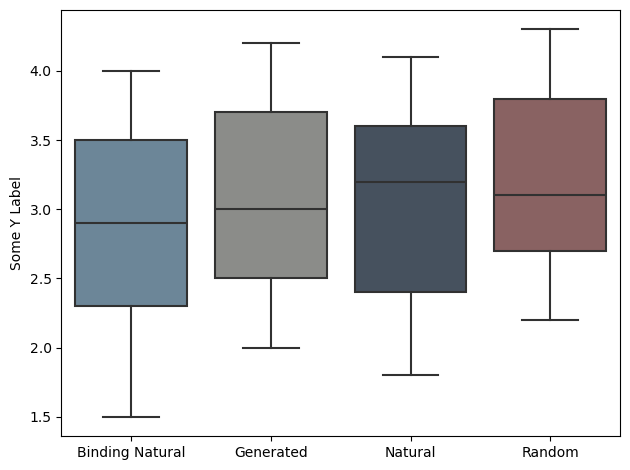

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_compare(binding_natural, generated, natural, random, labels, ylabel, filename):
    # Create the box plot
    plt.figure()
    data = [binding_natural, generated, natural, random]
    sns.boxplot(data=data, palette=["#65879F", "#8B8C89", "#425062", "#8F5C5C", "#CFACAC"])

    # Customizing the plot
    plt.xticks([0, 1, 2, 3], labels)
    plt.ylabel(ylabel)
    
    # Save and close the plot
    plt.tight_layout()
    # plt.savefig(filename)
    plt.show()
    plt.close()

# Test the function with sample data
if __name__ == "__main__":
    binding_natural = [1.5, 2.3, 2.9, 3.5, 4.0]
    generated = [2.0, 2.5, 3.0, 3.7, 4.2]
    natural = [1.8, 2.4, 3.2, 3.6, 4.1]
    random = [2.2, 2.7, 3.1, 3.8, 4.3]
    labels = ['Binding Natural', 'Generated', 'Natural', 'Random']
    ylabel = 'Some Y Label'
    filename = 'boxplot_output.png'

    plot_box_compare(binding_natural, generated, natural, random, labels, ylabel, filename)


/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

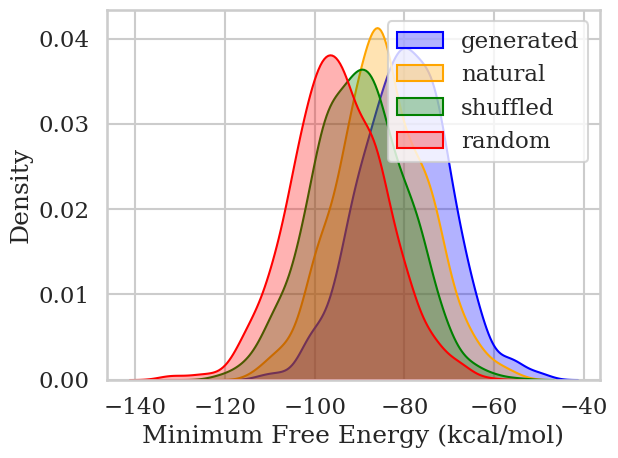

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_density_compare(binding_natural, generated, natural, random, xlabel, filename):
    # Create the density plot
    plt.figure()
    sns.kdeplot(binding_natural, color="blue", fill=True, label="generated", alpha=0.3)
    sns.kdeplot(generated, color="orange", fill=True, label="natural", alpha=0.3)
    sns.kdeplot(natural, color="green", fill=True, label="shuffled", alpha=0.3)
    sns.kdeplot(random, color="red", fill=True, label="random", alpha=0.3)

    # Customizing the plot
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.legend()

    # Save and close the plot
    plt.tight_layout()
    # plt.savefig(filename)
    plt.show()
    plt.close()

# Test the function with sample data
if __name__ == "__main__":
    binding_natural = np.random.normal(-80, 10, 1000)
    generated = np.random.normal(-85, 10, 1000)
    natural = np.random.normal(-90, 10, 1000)
    random = np.random.normal(-95, 10, 1000)
    xlabel = 'Minimum Free Energy (kcal/mol)'
    filename = 'density_plot_output.png'

    plot_density_compare(binding_natural, generated, natural, random, xlabel, filename)


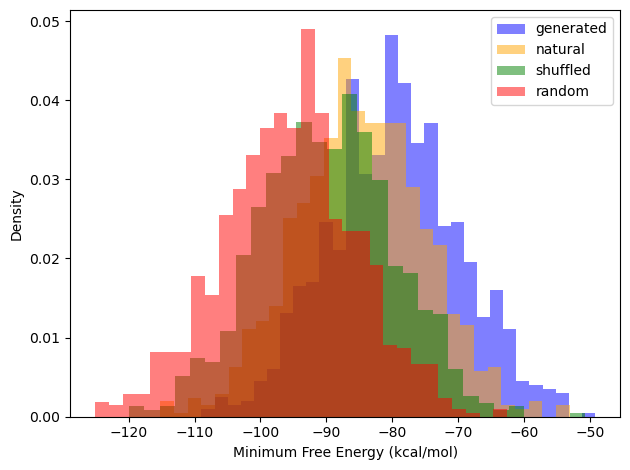

In [15]:
def plot_histogram_compare(binding_natural, generated, natural, random, xlabel, filename):
    plt.figure()
    plt.hist(binding_natural, bins=30, alpha=0.5, color='blue', label="generated", density=True)
    plt.hist(generated, bins=30, alpha=0.5, color='orange', label="natural", density=True)
    plt.hist(natural, bins=30, alpha=0.5, color='green', label="shuffled", density=True)
    plt.hist(random, bins=30, alpha=0.5, color='red', label="random", density=True)
    
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    # plt.savefig(filename)
    plt.show()
    plt.close()

# Test histogram
plot_histogram_compare(binding_natural, generated, natural, random, xlabel, "histogram_output.png")


/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

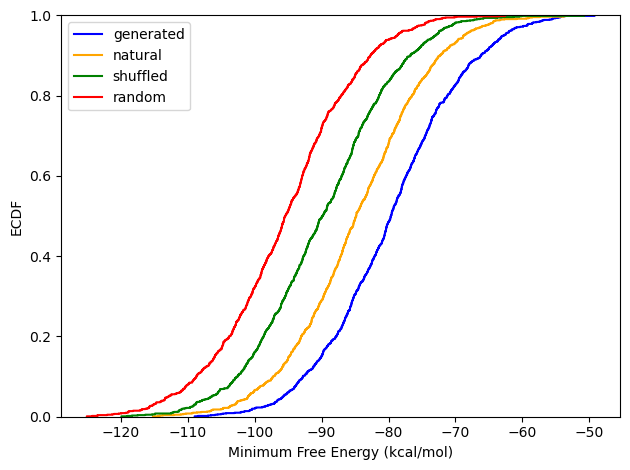

In [17]:
def plot_ecdf_compare(binding_natural, generated, natural, random, xlabel, filename):
    plt.figure()
    sns.ecdfplot(binding_natural, color="blue", label="generated")
    sns.ecdfplot(generated, color="orange", label="natural")
    sns.ecdfplot(natural, color="green", label="shuffled")
    sns.ecdfplot(random, color="red", label="random")
    
    plt.xlabel(xlabel)
    plt.ylabel('ECDF')
    plt.legend()
    plt.tight_layout()
    # plt.savefig(filename)
    plt.show()
    plt.close()

# Test ECDF
plot_ecdf_compare(binding_natural, generated, natural, random, xlabel, "ecdf_output.png")


/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

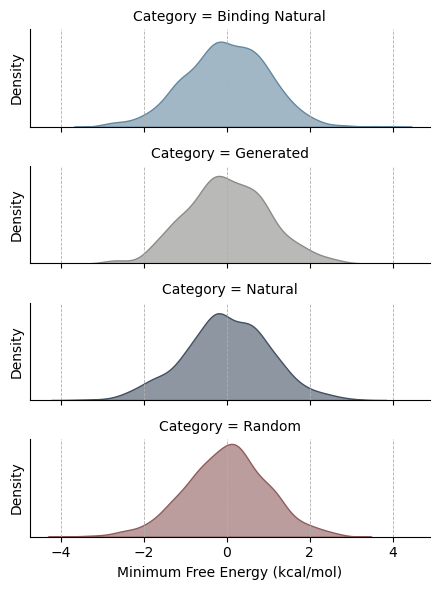

In [9]:
params = {'legend.fontsize': 48,
        'figure.figsize': (54, 32),
        'axes.labelsize': 60,
        'axes.titlesize':60,
        'xtick.labelsize':10,
        'ytick.labelsize':60,
        'lines.linewidth': 10}

plt.rcParams.update(params)

def plot_ridge_compare(binding_natural, generated, natural, random, xlabel, filename):
    import pandas as pd
    
    # Preparing the DataFrame for the ridge plot
    data = pd.DataFrame({
        "Binding Natural": binding_natural,
        "Generated": generated,
        "Natural": natural,
        "Random": random
    })
    
    # Melting the DataFrame to use with seaborn
    df_melted = data.melt(var_name='Category', value_name='Value')

    # Adjusting plot size and aspect ratio
    g = sns.FacetGrid(df_melted, row="Category", hue="Category", aspect=3, height=1.5, palette=["#65879F", "#8B8C89", "#425062", "#8F5C5C", "#CFACAC"])
    
    # KDE plot (density estimate)
    g.map(sns.kdeplot, "Value", fill=True, alpha=0.6)

    # Setting smaller labels
    g.set_axis_labels(xlabel, "Density")
    g.set_titles(size=10)  # Smaller category title font
    g.set_xlabels(xlabel, fontsize=10)  # X-axis label size
    g.set_ylabels("Density", fontsize=10)  # Y-axis label size
    
    # Adjust the scaling issue by ensuring tight layout and clearer axes
    g.set(yticks=[])
    
    for ax in g.axes.flat:
        ax.grid(True, which='major', linestyle='--', linewidth=0.6)  # Consistent gridlines
        # ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=False))  # Non-integer values if needed
    
    # Tight layout ensures there's no overlap
    plt.tight_layout()

    # Saving the plot with a higher DPI for clarity
    # plt.savefig(filename, dpi=300 )
    plt.show()
    plt.close()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
binding_natural = np.random.normal(0, 1, 1000)
generated = np.random.normal(0, 1, 1000)
natural = np.random.normal(0, 1, 1000)
random = np.random.normal(0, 1, 1000)
xlabel = 'Minimum Free Energy (kcal/mol)'
filename = 'density_plot_output.png'
# Test Ridge plot
plot_ridge_compare(binding_natural, generated, natural, random, xlabel, "ridge_plot_output.png")


/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

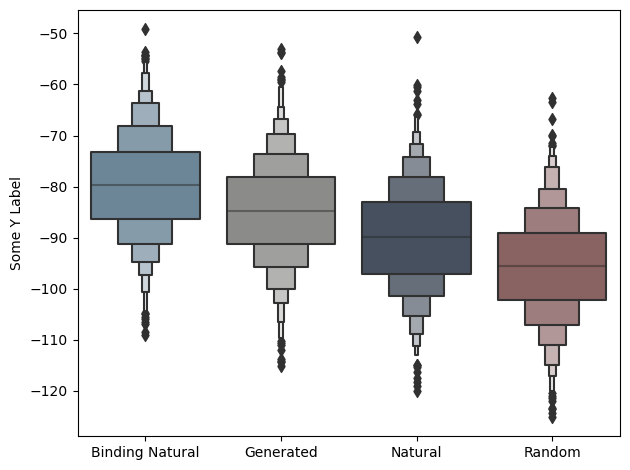

In [19]:
def plot_boxen_compare(binding_natural, generated, natural, random, labels, ylabel, filename):
    plt.figure()
    data = [binding_natural, generated, natural, random]
    sns.boxenplot(data=data, palette=["#65879F", "#8B8C89", "#425062", "#8F5C5C", "#CFACAC"])
    
    plt.xticks([0, 1, 2, 3], labels)
    plt.ylabel(ylabel)
    plt.tight_layout()
    # plt.savefig(filename)
    plt.show()
    plt.close()

# Test Boxen plot
plot_boxen_compare(binding_natural, generated, natural, random, ['Binding Natural', 'Generated', 'Natural', 'Random'], ylabel, "boxen_plot_output.png")


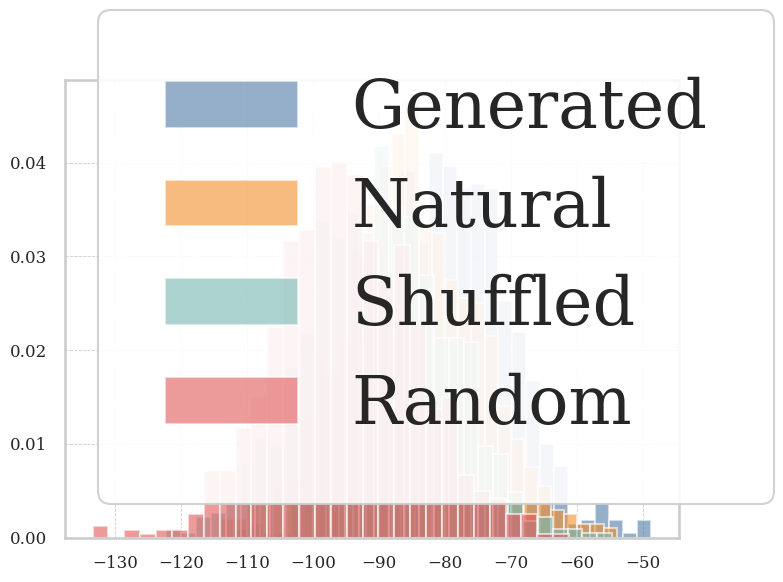

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Global Seaborn style for professionalism
sns.set(style="whitegrid", context="talk")  # 'talk' context for slightly larger elements

# Define a professional color palette
color_palette = ["#4E79A7", "#F28E2B", "#76B7B2", "#E15759"]

# Customize plot font
font = {
    'family': 'serif',
    'weight': 'normal',
    'size': 14,
}
plt.rc('font', **font)

# High DPI for high-quality exports
dpi = 300

params = {'legend.fontsize': 48,
        'figure.figsize': (54, 32),
        'axes.labelsize': 60,
        'axes.titlesize':60,
        'xtick.labelsize':60,
        'ytick.labelsize':60,
        'lines.linewidth': 10}

plt.rcParams.update(params)

def set_professional_plot(ax, xlabel, ylabel):
    """Common styling for all plots to make them look polished."""
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure integer x-ticks if needed
    ax.tick_params(axis='both', which='major', labelsize=12)      # Consistent label sizes
    ax.grid(True, which='major', linestyle='--', linewidth=0.6)   # Faint gridlines

    # Adding a legend box for clarity
    ax.legend(frameon=True, fancybox=True, framealpha=0.9, borderpad=1)
    ax.margins(0.05)  # Add some padding around the plot edges
def plot_histogram_compare(binding_natural, generated, natural, random, xlabel, filename):
    plt.figure(figsize=(8, 6))
    bins = 30
    plt.hist(binding_natural, bins=bins, alpha=0.6, color=color_palette[0], label="Generated", density=True)
    plt.hist(generated, bins=bins, alpha=0.6, color=color_palette[1], label="Natural", density=True)
    plt.hist(natural, bins=bins, alpha=0.6, color=color_palette[2], label="Shuffled", density=True)
    plt.hist(random, bins=bins, alpha=0.6, color=color_palette[3], label="Random", density=True)

    ax = plt.gca()
    set_professional_plot(ax, xlabel, 'Density')
    plt.tight_layout()
    # plt.savefig(filename, dpi=dpi)
    plt.show()
    plt.close()

# Test histogram
plot_histogram_compare(binding_natural, generated, natural, random, "Minimum Free Energy (kcal/mol)", "professional_histogram.png")


/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

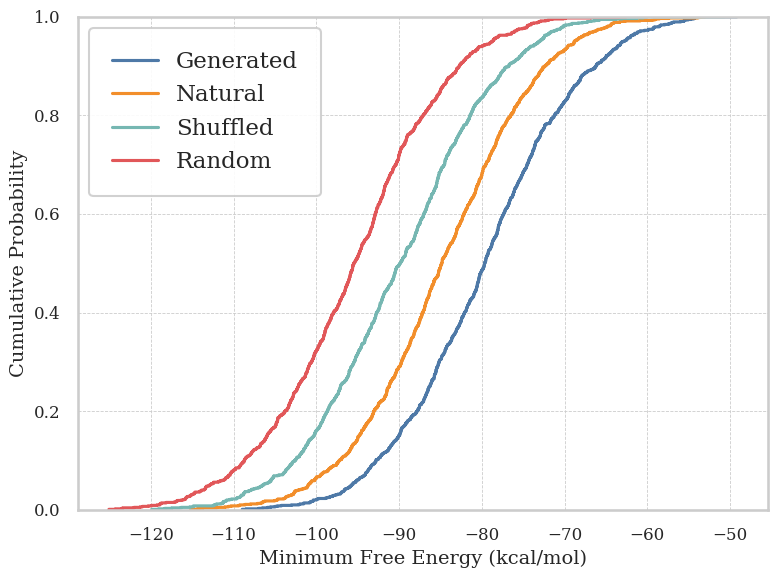

In [22]:
def plot_ecdf_compare(binding_natural, generated, natural, random, xlabel, filename):
    plt.figure(figsize=(8, 6))
    sns.ecdfplot(binding_natural, color=color_palette[0], label="Generated")
    sns.ecdfplot(generated, color=color_palette[1], label="Natural")
    sns.ecdfplot(natural, color=color_palette[2], label="Shuffled")
    sns.ecdfplot(random, color=color_palette[3], label="Random")
    
    ax = plt.gca()
    set_professional_plot(ax, xlabel, 'Cumulative Probability')
    plt.tight_layout()
    plt.show()
    plt.close()

# Test ECDF
plot_ecdf_compare(binding_natural, generated, natural, random, "Minimum Free Energy (kcal/mol)", "professional_ecdf.png")


/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/anaconda3/envs/rllm/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

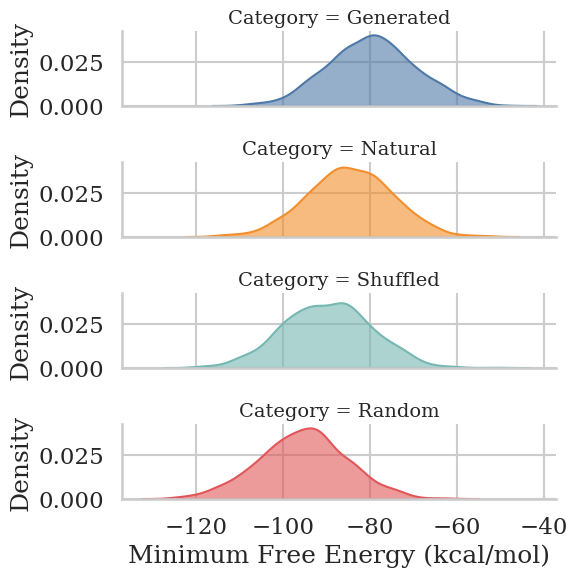

In [23]:
def plot_ridge_compare(binding_natural, generated, natural, random, xlabel, filename):
    import pandas as pd
    data = pd.DataFrame({
        "Generated": binding_natural,
        "Natural": generated,
        "Shuffled": natural,
        "Random": random
    })
    
    df_melted = data.melt(var_name='Category', value_name='Value')

    g = sns.FacetGrid(df_melted, row="Category", hue="Category", aspect=4, height=1.5, palette=color_palette)
    g.map(sns.kdeplot, "Value", fill=True, alpha=0.6)
    
    g.set_axis_labels(xlabel, "Density")
    g.set_titles(size=14)
    
    plt.tight_layout()
    plt.show()
    plt.close()

# Test Ridge plot
plot_ridge_compare(binding_natural, generated, natural, random, "Minimum Free Energy (kcal/mol)", "professional_ridge.png")


In [1]:
import random

def shuffle_rna_sequences(rna_sequences):
    """
    Shuffle the nucleotides within each RNA sequence in the list.
    
    Parameters:
    rna_sequences (list of str): List of RNA sequences to shuffle.

    Returns:
    list of str: List of RNA sequences with shuffled nucleotides.
    """
    shuffled_sequences = []
    for rna in rna_sequences:
        rna_list = list(rna)  # Convert string to list for shuffling
        random.shuffle(rna_list)
        shuffled_sequences.append(''.join(rna_list))  # Convert back to string
    return shuffled_sequences

# Test case
rna_sequences = ["AUGCGAU", "CCGUAAUG", "GAUCUGA"]
shuffled_rna_sequences = shuffle_rna_sequences(rna_sequences)

# Display the original and shuffled RNA sequences
print("Original RNA sequences:", rna_sequences)
print("Shuffled RNA sequences:", shuffled_rna_sequences)

Original RNA sequences: ['AUGCGAU', 'CCGUAAUG', 'GAUCUGA']
Shuffled RNA sequences: ['GAAUGCU', 'GCAUUGAC', 'GUCAAUG']


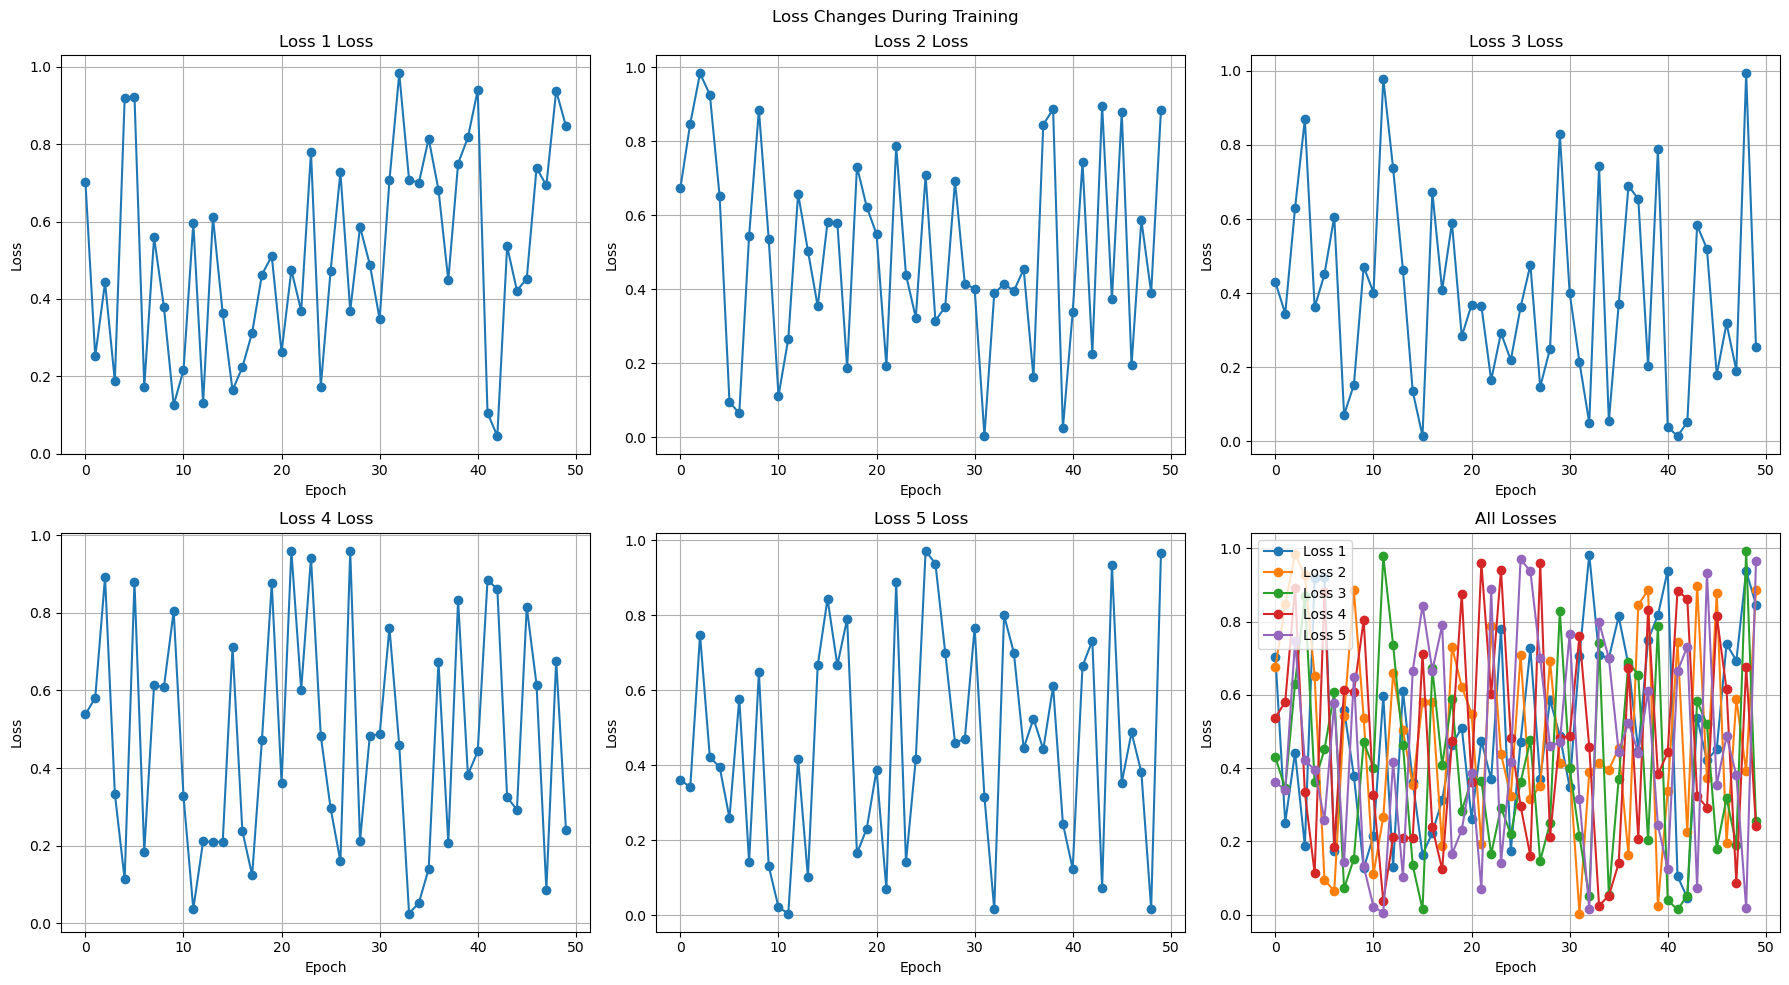

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_losses(losses, labels, title="Loss Changes During Training"):
    """
    Args:
    - losses: List of 5 arrays, where each array corresponds to the losses for a specific term.
    - labels: List of 5 strings, the label for each loss term.
    - title: Title for the overall plot.
    """
    num_epochs = len(losses[0])  # Assuming all losses have the same length
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Create a grid for 6 plots (2 rows, 3 columns)
    
    # Plot individual losses
    for i in range(5):
        ax = axs[i//3, i%3]  # Access the subplot using row-column indexing
        ax.plot(range(num_epochs), losses[i], label=labels[i], marker='o')
        ax.set_title(f"{labels[i]} Loss")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.grid(True)
    
    # Plot all losses together in the last subplot
    ax_all = axs[1, 2]
    for i in range(5):
        ax_all.plot(range(num_epochs), losses[i], label=labels[i], marker='o')
    
    ax_all.set_title("All Losses")
    ax_all.set_xlabel('Epoch')
    ax_all.set_ylabel('Loss')
    ax_all.grid(True)
    ax_all.legend()

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Generate random losses for 5 terms over 50 epochs
num_epochs = 50
loss1 = np.random.rand(num_epochs)
loss2 = np.random.rand(num_epochs)
loss3 = np.random.rand(num_epochs)
loss4 = np.random.rand(num_epochs)
loss5 = np.random.rand(num_epochs)

losses = [loss1, loss2, loss3, loss4, loss5]
labels = ['Loss 1', 'Loss 2', 'Loss 3', 'Loss 4', 'Loss 5']

# Plot the random losses
plot_losses(losses, labels)

In [1]:
def save_rna_fasta(rna_sequences, output_fasta, j):
    """Saves the RNA sequences to a FASTA file."""
    with open(output_fasta, 'a') as fasta_file:
        for i, rna in enumerate(rna_sequences, 1):
            fasta_file.write(f">sequence_{j}_{i}\n{rna}\n")

def postprocess_rna(rna):
    return rna.replace('b', 'A').replace('j', 'C').replace(
                    'u', 'U').replace('z', 'G').replace(' ', '').replace(
                    'B', 'A').replace('J', 'C').replace('U', 'U').replace('Z', 'G')


In [19]:
def load_sequences(file_path, chunk_size=1000000):
    with open(file_path, 'r') as file:
        chunk = []
        for line in file:
            chunk.append(line.strip())
            if len(chunk) >= chunk_size:
                yield chunk
                chunk = []
        if chunk:
            yield chunk


# ref_protein = "MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHSLGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQKDVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPITVKFAANPNQNKNVALLSQLYHSPARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNASSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAMAIASLNGYRLGDKILQVSFKTNKSHK"
ref_protein = "MGSDKRVSRTERSGRYGSIIDRDDRDERESRSRRRDSDYKRSSDDRRGDRYDDYRDYDSPERERERRNSDRSEDGYHSDGDYGEHDYRHDISDERESKTIMLRGLPITITESDIREMMESFEGPQPADVRLMKRKTGVSRGFAFVEFYHLQDATSWMEANQKKLVIQGKHIAMHYSNPRPKFEDWLCNKCCLNNFRKRLKCFRCGADKFDSEQEVPPGTTESVQSVDYYCDTIILRNIAPHTVVDSIMTALSPYASLAVNNIRLIKDKQTQQNRGFAFVQLSSAMDASQLLQILQSLHPPLKIDGKTIGVDFAKSARKDLVLSDGNRVSAFSVASTAIAAAQWSSTQSQSGEGGSVDYSYLQPGQDGYAQYAQYSQDYQQFYQQQAGGLESDASSASGTAVTTTSAAVVSQSPQLYNQTSNPPGSPTEEAQPSTSTSTQAPAASPTGVVPGTKYAVPDTSTYQYDESSGYYYDPTTGLYYDPNSQYYYNSLTQQYLYWDGEKETYVPAAESSSHQQSGLPPAKEGKEKKEKPKSKTAQQIAKDMERWAKSLNKQKENFKNSFQPVNSLREEERRESAAADAGFALFEKKGALAERQQLIPELVRNGDEENPLKRGLVAAYSGDSDNEEELVERLESEEEKLADWKKMACLLCRRQFPNKDALVRHQQLSDLHKQNMDIYRRSRLSEQELEALELREREMKYRDRAAERREKYGIPEPPEPKRKKQFDAGTVNYEQPTKDGIDHSNIGNKMLQAMGWREGSGLGRKCQGITAPIEAQVRLKGAGLGAKGSAYGLSGADSYKDAVRKAMFARFTEME"
output_fasta = "/data6/sobhan/RLLM/notebooks/rbm5_rnas.fasta"

j = 0
for chunk in load_sequences("/data6/sobhan/RLLM/dataset/rph/train_rp.txt"):
    # Find RNA sequences corresponding to the reference protein
    matching_rnas = [postprocess_rna(line.strip().split('$')[1]) for line in chunk if line.strip().split('$')[0] == ref_protein]
    
    # Save the matching RNA sequences to a FASTA file
    if matching_rnas:
        save_rna_fasta(matching_rnas, output_fasta, j)
    j+=1
print("Done!")

KeyboardInterrupt: 

In [20]:
import json
import numpy as np
with open("/data6/sobhan/RLLM/results/validation/RBM5v3/RBM5.json", "r") as file:
    data = json.load(file)

generated_scores = []
generated_sequences = []
for prediction in data['predictions']:
    if  "Generated" in prediction["id"]:
        generated_scores.append(prediction["score"])
        generated_sequences.append(prediction["sequence"])


In [21]:
best_num=128
print(len(generated_sequences))
generated_sequences=list(np.array(generated_sequences)[np.argsort(np.array(generated_scores))[-best_num:]])
generated_scores = np.sort(np.array(generated_scores))[-best_num:]
print(len(generated_scores))
print(len(generated_sequences))

256
128
128


In [22]:
save_rna_fasta(generated_sequences, "generated_rbm5.fasta", 0)

In [1]:
import csv

def csv_to_fasta(input_csv, output_fasta):
    with open(input_csv, 'r') as csv_file, open(output_fasta, 'w') as fasta_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            # Extract entryID and sequence for each row
            entry_id = row['entryID']
            sequence = row['seq']
            
            # Write in FASTA format
            fasta_file.write(f">{entry_id}\n")
            fasta_file.write(f"{sequence}\n")

# Provide the paths to your CSV file and output FASTA file
input_csv = '/data6/sobhan/RNAGEN/data/DASHR2_GEO_hg38_sequenceTable_export.csv'
output_fasta = '/data6/sobhan/RLLM/dataset/rph/natural/natural_pirnas.fna'

# Convert the CSV to FASTA
csv_to_fasta(input_csv, output_fasta)

print(f"Conversion completed! FASTA file saved as {output_fasta}")


Conversion completed! FASTA file saved as /data6/sobhan/RLLM/dataset/rph/natural/natural_pirnas.fna


In [3]:
import random

def read_rna_from_fasta(file_path):
    with open(file_path, 'r') as file:
        sequences = []
        seq = ""
        for line in file:
            if line.startswith('>'):
                if seq:
                    sequences.append(seq)
                    seq = ""
            else:
                seq += line.strip()
        if seq:  # Add the last sequence
            sequences.append(seq)
    return sequences

def read_rna_from_text(file_path):
    with open(file_path, 'r') as file:
        return [line.strip() for line in file if line.strip()]

def get_valid_samples(rna_list, num_samples=64, max_length=75):
    """Sample RNAs that are shorter than or equal to the max_length."""
    valid_samples = [rna for rna in rna_list if len(rna) <= max_length]
    if len(valid_samples) < num_samples:
        raise ValueError(f"Not enough valid RNAs shorter than {max_length} nucleotides.")
    return random.sample(valid_samples, num_samples)

def save_samples(output_file, natural_binding_rnas, natural_rnas, rnagen_rnas, num_samples=64, num_iterations=10):
    with open(output_file, 'w') as fasta_file:
        for j in range(num_iterations):
            # Get valid samples (length <= 75)
            sampled_binding_rnas = get_valid_samples(natural_binding_rnas, num_samples)
            sampled_natural_rnas = get_valid_samples(natural_rnas, num_samples)
            sampled_rnagen_rnas = get_valid_samples(rnagen_rnas, num_samples)

            # Write Binding Natural RNAs
            for i, rna in enumerate(sampled_binding_rnas):
                fasta_file.write(f">Binding Natural RNA {i+1}_iter{j+1}\n{rna}\n")

            # Write Natural pi_RNAs
            for i, rna in enumerate(sampled_natural_rnas):
                fasta_file.write(f">Natural pi_RNA {i+1}_iter{j+1}\n{rna}\n")

            # Write RNAGEN RNAs
            for i, rna in enumerate(sampled_rnagen_rnas):
                fasta_file.write(f">RNAGEN RNA {i+1}_iter{j+1}\n{rna}\n")

# Paths to your files
natural_binding_rnas_path = "/data6/bilginer/CLIP_CLUSTERED_FASTA/RBM5_clustered.fa"
natural_rnas_path = "/data6/sobhan/RLLM/dataset/rph/natural/natural_pirnas.fna"
rnagen_rnas_path = "/data6/sobhan/RNAGEN/output/RBM5_inv_distance_softmax_method_maxiters_3000_v1/RBM5_best_binding_sequences.txt"
output_fasta = "sampled_rnas.fasta"

# Read RNA sequences from the files
natural_binding_rnas = read_rna_from_fasta(natural_binding_rnas_path)
natural_rnas = read_rna_from_fasta(natural_rnas_path)
rnagen_rnas = read_rna_from_text(rnagen_rnas_path)

# Save samples to FASTA file
save_samples(output_fasta, natural_binding_rnas, natural_rnas, rnagen_rnas)

print(f"Sampled RNAs saved to {output_fasta}")


Sampled RNAs saved to sampled_rnas.fasta
